<a href="https://colab.research.google.com/github/nagamani0604/Nagamani_INFO5731_Fall2024/blob/main/Somireddy_Nagamani_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


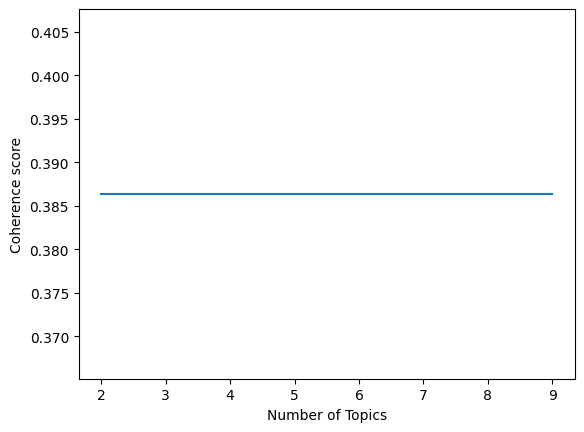

Optimal Number of Topics: 3
Topic 1: 0.133*"processing" + 0.133*"topics" + 0.133*"natural" + 0.133*"language" + 0.133*"exploring" + 0.033*"first" + 0.033*"document" + 0.033*"content" + 0.033*"added" + 0.033*"text"
Topic 2: 0.146*"document" + 0.083*"second" + 0.083*"added" + 0.083*"content" + 0.083*"analysis" + 0.083*"topic" + 0.083*"text" + 0.083*"modeling" + 0.083*"lda" + 0.083*"first"
Topic 3: 0.067*"lda" + 0.067*"modeling" + 0.067*"document" + 0.067*"first" + 0.067*"topic" + 0.067*"analysis" + 0.067*"text" + 0.067*"exploring" + 0.067*"added" + 0.067*"content"


In [2]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk

nltk.download('stopwords')
stop_words = stopwords.words('english')

# Sample raw data
raw_texts = [
    "This is my first document.",
    "This is the second document with added content.",
    "Text analysis with LDA topic modeling.",
    "Topics exploring in natural language processing."
]

texts = [
    [word for word in simple_preprocess(doc) if word not in stop_words]
    for doc in raw_texts
]

texts = [text for text in texts if len(text) > 0]

assert len(texts) > 0, "Valid documents not found in `texts`. Please check your preprocessing."

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

assert len(dictionary) > 0, "Empty Dictionary. Please check your tokenized data."
assert len(corpus) > 0, "Empty Corpus. Please check tokenized data."

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=100,
                                       update_every=1,
                                       chunksize=100,
                                       passes=10,
                                       alpha='auto',
                                       per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

limit = 10
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=limit, step=1)

x = range(2, limit, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.show()

optimal_model = model_list[coherence_values.index(max(coherence_values))]
optimal_num_topics = coherence_values.index(max(coherence_values)) + 2

print(f"Optimal Number of Topics: {optimal_num_topics}")
topics = optimal_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic {idx + 1}: {topic}")


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


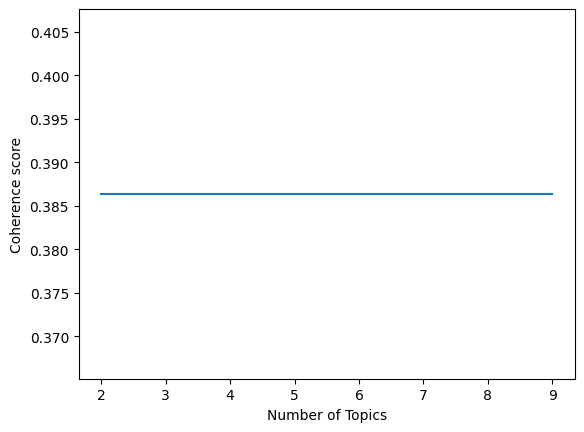

Optimal Number of Topics: 2
Topic 1: -0.436*"processing" + -0.436*"natural" + -0.436*"language" + -0.436*"exploring" + -0.436*"topics" + -0.099*"analysis" + -0.099*"lda" + -0.099*"topic" + -0.099*"modeling" + -0.099*"text"
Topic 2: 0.436*"lda" + 0.436*"analysis" + 0.436*"modeling" + 0.436*"topic" + 0.436*"text" + -0.099*"natural" + -0.099*"topics" + -0.099*"processing" + -0.099*"language" + -0.099*"exploring"


In [3]:
# Write your code here

import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk

nltk.download('stopwords')
stop_words = stopwords.words('english')

raw_texts = [
    "This is my first document.",
    "This is the second document with added content.",
    "Text analysis with LDA topic modeling.",
    "Topics exploring in natural language processing."
]

texts = [
    [word for word in simple_preprocess(doc) if word not in stop_words]
    for doc in raw_texts
]

texts = [text for text in texts if len(text) > 0]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

def compute_coherence_values_lsa(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lsa_model = models.LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(lsa_model)

        coherence_model = CoherenceModel(model=lsa_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

limit = 10
model_list, coherence_values = compute_coherence_values_lsa(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=limit, step=1)

x = range(2, limit, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.show()

optimal_model = model_list[coherence_values.index(max(coherence_values))]
optimal_num_topics = coherence_values.index(max(coherence_values)) + 2

print(f"Optimal Number of Topics: {optimal_num_topics}")
topics = optimal_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic {idx + 1}: {topic}")



## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Error retrieving topics for 2 topics: dictionary has to be provided if topics are to be used.
Error retrieving topics for 3 topics: dictionary has to be provided if topics are to be used.
Error retrieving topics for 4 topics: dictionary has to be provided if topics are to be used.
Error retrieving topics for 5 topics: dictionary has to be provided if topics are to be used.
Error retrieving topics for 6 topics: dictionary has to be provided if topics are to be used.
Error retrieving topics for 7 topics: dictionary has to be provided if topics are to be used.
Error retrieving topics for 8 topics: dictionary has to be provided if topics are to be used.
Error retrieving topics for 9 topics: dictionary has to be provided if topics are to be used.
Error retrieving topics for 10 topics: dictionary has to be provided if topics are to be used.


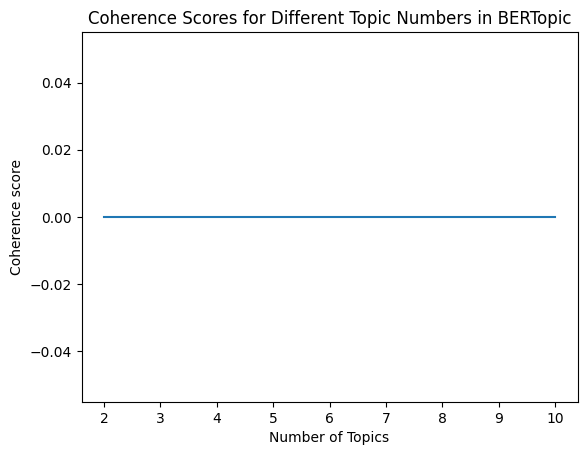

Optimal Number of Topics: 2
Topic 1: False
Topic 2: False


In [5]:
!pip install bertopic

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk

nltk.download('stopwords')
stop_words = stopwords.words('english')

raw_texts = [
     "This is my first document.",
    "This is the second document with added content.",
    "Text analysis with LDA topic modeling.",
    "Topics exploring in natural language processing.",
    "Data science involves statistics and programming.",
    "Understanding machine learning algorithms is key.",
    "Natural language processing techniques are useful.",
    "Another document focusing on deep learning methods.",
    "ML and AI are intertwined.",
    "Big data analytics is essential for modern data science."
]

texts = [
    " ".join([word for word in doc.lower().split() if word not in stop_words])
    for doc in raw_texts
]

def compute_coherence_values_bertopic(texts, min_topics=2, max_topics=10):
    coherence_values = []
    model_list = []

    for num_topics in range(min_topics, max_topics + 1):
        topic_model = BERTopic(nr_topics=num_topics)

        topics, _ = topic_model.fit_transform(texts)
        model_list.append(topic_model)

        try:
            topic_words = [topic_model.get_topic(i) for i in range(num_topics)]
            coherence_model = CoherenceModel(topics=[[word for word, _ in words] for words in topic_words if isinstance(words, list)],
                                             texts=[text.split() for text in texts],
                                             coherence="c_v")
            coherence_values.append(coherence_model.get_coherence())
        except Exception as e:
            print(f"Error retrieving topics for {num_topics} topics: {e}")
            coherence_values.append(0)

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values_bertopic(texts, min_topics=2, max_topics=10)

x = range(2, 11)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.title("Coherence Scores for Different Topic Numbers in BERTopic")
plt.xticks(x)
plt.show()

optimal_model = model_list[coherence_values.index(max(coherence_values))]
optimal_num_topics = coherence_values.index(max(coherence_values)) + 2

print(f"Optimal Number of Topics: {optimal_num_topics}")
for i in range(optimal_num_topics):
    print(f"Topic {i + 1}: {optimal_model.get_topic(i)}")


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


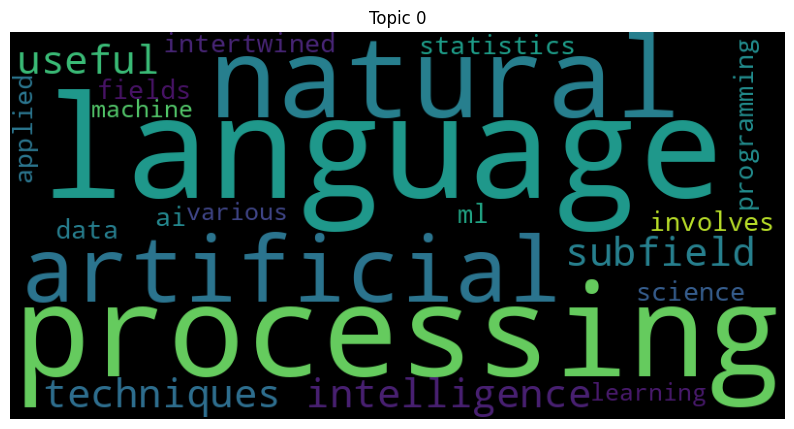

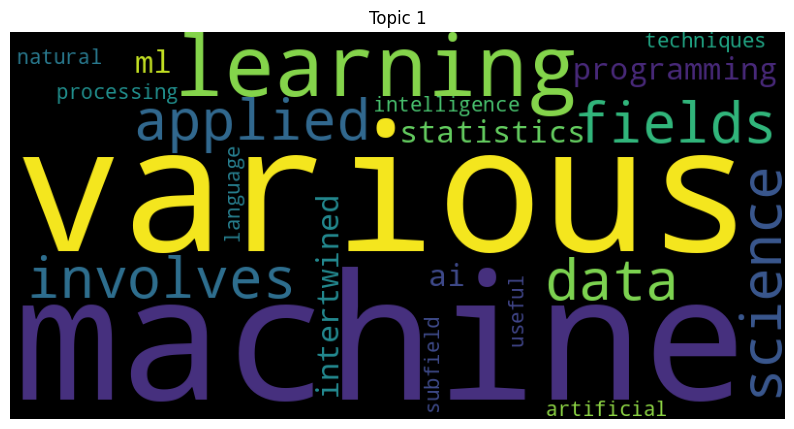

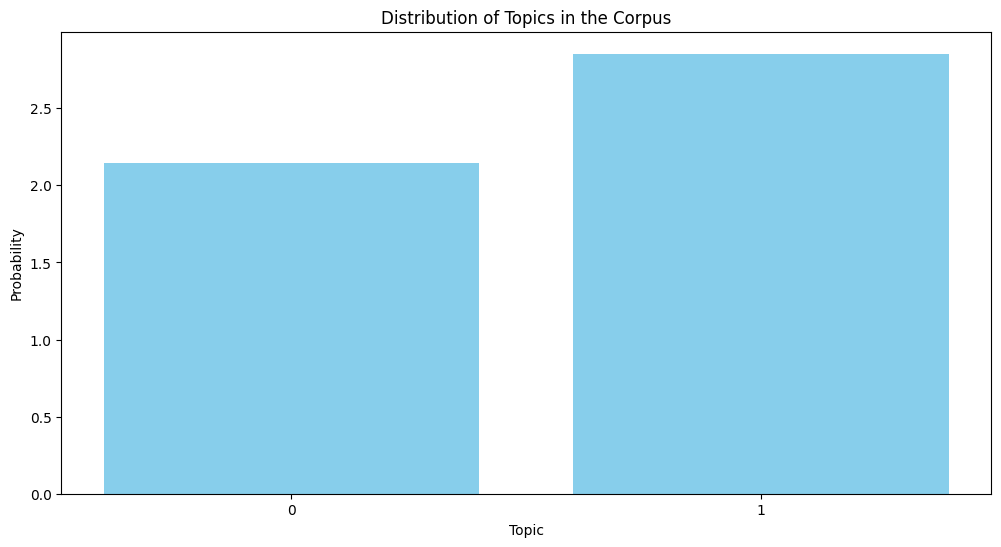

In [7]:
!pip install gensim matplotlib pyLDAvis wordcloud

import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim_models

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

documents = [
       "Data science involves statistics and programming.",
    "Machine learning can be applied in various fields.",
    "Natural language processing techniques are useful.",
    "Natural language processing is a subfield of artificial intelligence.",
    "ML and AI are intertwined."
]

def preprocess(doc):
    doc = re.sub(r'[^a-zA-Z\s]', '', doc)
    doc = doc.lower()
    return [word for word in doc.split() if word not in stop_words]

processed_docs = [preprocess(doc) for doc in documents]

dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

num_topics = 2
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)


# A. Word Cloud for Each Topic
for i in range(num_topics):
    plt.figure(figsize=(10, 6))
    plt.imshow(WordCloud(width=800, height=400).fit_words(dict(lda_model.show_topic(i, 30))))
    plt.axis('off')
    plt.title(f'Topic {i}')
    plt.show()

# B. Topic Distribution Bar Chart
topic_distribution = [0] * num_topics
for doc in corpus:
    topic_probabilities = lda_model.get_document_topics(doc)
    for topic, prob in topic_probabilities:
        topic_distribution[topic] += prob

plt.figure(figsize=(12, 6))
plt.bar(range(num_topics), topic_distribution, color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Distribution of Topics in the Corpus')
plt.xticks(range(num_topics))
plt.show()

# C. Intertopic Distance Map (using pyLDAvis)
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here

1. Latent Dirichlet Allocation (LDA)
Coherent topics can be produced by LDA, especially when datasets are well-defined. Depending on the number of topics specified and other hyperparameters, the results may vary.
Gives good coherence scores when the parameters are modified correctly. On the other hand, it might have trouble with complex topic structures or noisy data.

2. Non-Negative Matrix Factorization (NMF)
The results are easy to interpret because NMF produces non-negative factors. Initial conditions can have a significant impact on NMF results.
Competitive coherence scores can be obtained from NMF, particularly for datasets with distinct topic divisions. It might, however, demand meticulous initialization and parameter adjustment.

3. BERTopic
Extracts complex meanings and relationships using cutting-edge language models. Uses transformer models, which means it uses more resources than traditional methods.
Generates coherence scores that are generally higher than those of LDA and NMF, particularly on larger and more intricate datasets. Depending on how well the topics are defined, the interpretability may change.

Comparison: Which One is Better?
The "best" algorithm is mostly determined by the particular needs of your dataset and task
For smaller datasets and easier tasks, LDA or NMF might be appropriate, providing fast results with acceptable coherence.
It is better to use BERTopic  for larger, complex datasets where context and semantic relationships are important.
Even with their higher computational demands and complexity, they frequently produce more meaningful topics and higher coherence scores.


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

Learning Experience
Completing this assignment gave me a thorough understanding of how to handle text data and apply different topic modeling algorithms.
I developed a more thorough understanding of the fundamental ideas and practical applications of these algorithms, including LDA, NMF, BERTopic.
I had to consider feature extraction and representation critically for each approach, particularly in the context of how the algorithm selection impacts the coherence and interpretability of the final topics.

Challenges Encountered
Several challenges arose during the exercise.
One major challenge was handling the computational demands of some algorithms, especially BERTopic, which uses time-consuming transformer models.
Occasionally, this resulted in slower processing times and required parameter or dataset changes.

Relevance to Your Field of Study
 By identifying underlying themes and patterns, topic modeling—a fundamental NLP technique—makes it easier to comprehend massive text datasets.
 The capacity to extract valuable insights from unstructured data is becoming more and more important as natural language processing (NLP) advances.


'''